<a href="https://colab.research.google.com/github/Nimo160302/Deep_Learning_Codes/blob/main/RNN_(Stock_Price).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# https://drive.google.com/drive/folders/1Gq79ssZiHqEKPVAjGsQfKYUDejW6l4J2?usp=sharing

In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

In [28]:
df =  pd.read_csv('/content/SBIN.NS_data.csv')

In [54]:
df.head()

,Close,High,Low,Open,Volume
1,314.799225,316.211092,312.634345,315.034536,17379320
2,319.364197,319.881898,313.763810,314.846235,20324236
3,314.093231,318.093519,312.493104,318.093519,21853208
4,300.256958,312.210773,299.033352,312.210773,35645325
5,299.692169,307.786876,296.868436,305.386714,50966826


In [53]:
df.tail()

,Close,High,Low,Open,Volume
988,626.248047,638.689434,624.674460,634.116102,14998068
989,627.526550,630.722948,625.166170,628.313344,10153089
990,637.853394,638.738574,628.460915,630.182052,14417646
991,640.656433,642.525060,635.837225,639.525376,16982092
992,631.460632,638.886098,629.001865,634.853743,13221898


In [30]:
df = df.iloc[1:].copy()

In [31]:
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [32]:
#there might be data values written like null, or written something
for col in df.columns:
  df[col] = pd.to_numeric(df[col] , errors = 'coerce')

In [33]:
df.isnull().sum()
#df.fillna(df.mean() , inplace = True)

,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [34]:
data =  df.Close.values.reshape(-1, 1)

In [35]:
data[0:5]

array([[314.79922485],
       [319.36419678],
       [314.0932312 ],
       [300.25695801],
       [299.69216919]])

In [36]:
#scale the data
scaler  =  MinMaxScaler(feature_range  = (0, 1))
#to make data scale in variant and suitable for model
scaled_data  =  scaler.fit_transform(data)

In [37]:
#Creating Sequence for training
def create_sequence(data, seq_length):
  x = []
  y = []
  for i in range(len(data) - seq_length):
    x.append(data[i : i + seq_length])
    y.append(data[i + seq_length])
  return np.array(x), np.array(y)

In [38]:
#Define Sequence length (no of previos days to consider)
seq_length = 60

In [39]:
X , y  =  create_sequence(scaled_data , seq_length)

In [40]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, random_state=42)

In [41]:
#Reshape data fro LSTM input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [42]:
input_shape = (X_train.shape[1], X_train.shape[2])
output_size = y_train.shape[1] if len(y_train.shape) > 1 else 1

print(input_shape, output_size)


(60, 1) 1


In [44]:
display(df.info)
df.head()

<bound method DataFrame.info of           Close        High         Low        Open    Volume
1    314.799225  316.211092  312.634345  315.034536  17379320
2    319.364197  319.881898  313.763810  314.846235  20324236
3    314.093231  318.093519  312.493104  318.093519  21853208
4    300.256958  312.210773  299.033352  312.210773  35645325
5    299.692169  307.786876  296.868436  305.386714  50966826
..          ...         ...         ...         ...       ...
988  626.248047  638.689434  624.674460  634.116102  14998068
989  627.526550  630.722948  625.166170  628.313344  10153089
990  637.853394  638.738574  628.460915  630.182052  14417646
991  640.656433  642.525060  635.837225  639.525376  16982092
992  631.460632  638.886098  629.001865  634.853743  13221898

[992 rows x 5 columns]>

,Close,High,Low,Open,Volume
1,314.799225,316.211092,312.634345,315.034536,17379320
2,319.364197,319.881898,313.763810,314.846235,20324236
3,314.093231,318.093519,312.493104,318.093519,21853208
4,300.256958,312.210773,299.033352,312.210773,35645325
5,299.692169,307.786876,296.868436,305.386714,50966826


In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [48]:
def build_keras_rnn_model(input_shape, output_size):
  model  = Sequential()
  model.add(SimpleRNN(units  = 50, return_sequences = True, input_shape = input_shape))
  model.add(SimpleRNN(units  = 50))
  model.add(Dense(units = output_size))
  model.compile(optimizer = 'adam', loss = 'mean_squared_error')
  return model

In [49]:
model  = build_keras_rnn_model(input_shape, output_size)
#Train the model
#Adding callbacks for visualization is handeled by the history object returnes by model.fit
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_split= 0.1)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0378 - val_loss: 0.0014
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0010 - val_loss: 4.8829e-04
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 6.0442e-04 - val_loss: 5.0140e-04
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 7.1516e-04 - val_loss: 5.7597e-04
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 5.9245e-04 - val_loss: 3.7888e-04
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 5.4330e-04 - val_loss: 3.7010e-04
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 4.9291e-04 - val_loss: 3.8021e-04
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 5.0152e-04 - val_loss: 4.2101e-04
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 6.2420e-04 - val_loss: 0.0011
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 8.2140e-04 - val_loss: 5.8491e-04


In [50]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 60, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,105 (90.26 KB)

 Trainable params: 7,701 (30.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,404 (60.18 KB)

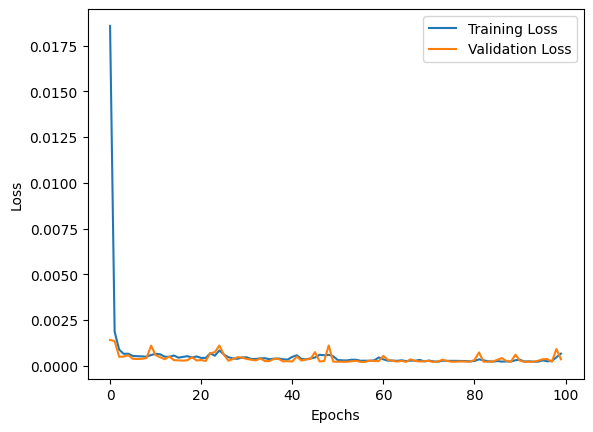

In [52]:
#plot training and validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [57]:
from sklearn.metrics import mean_squared_error
loss  =  model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


predictions = model.predict(X_test)

#Inverse trandform the prediction and actual values to the original value
prediction_inverse = scaler.inverse_transform(predictions)
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

#Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inverse ,  prediction_inverse))
print(f'Root Mean Squared Error: {rmse}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 3.3507e-04
Test Loss: 0.0003810090129263699
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Root Mean Squared Error: 9.810552880517308


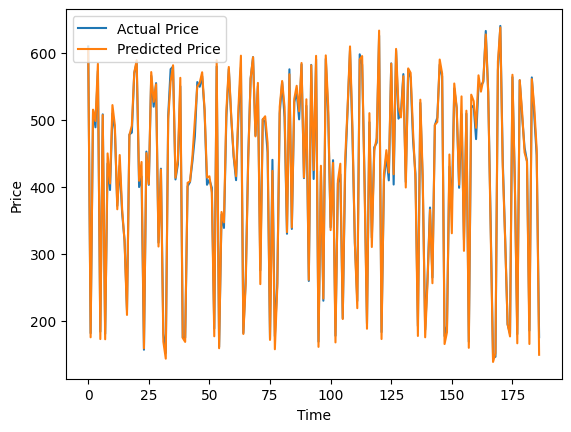

In [59]:
#visualize the data set
plt.plot(y_test_inverse, label = 'Actual Price')
plt.plot(prediction_inverse, label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [60]:
#get the weights of each layer
for layer in model.layers:
  weights  =  layer.get_weights()
  print(f'Layer: {layer.name}')
  print(f'Weights: {weights}')

Layer: simple_rnn_2
Weights: [array([[-0.25625598,  0.05852459,  0.2908047 ,  0.18657617, -0.35041592,
        -0.244112  ,  0.04090751, -0.16188915,  0.21682253,  0.10563231,
        -0.20660341, -0.01090463, -0.0289903 ,  0.2591779 , -0.0754476 ,
        -0.0253896 ,  0.09537138, -0.3391778 ,  0.03440376,  0.23774183,
        -0.3434346 ,  0.15991591, -0.3494271 ,  0.1264015 , -0.10365769,
         0.05879037, -0.12119089,  0.1633766 , -0.02386294,  0.05776342,
        -0.1528522 ,  0.00427137,  0.1627291 ,  0.05249076,  0.3297557 ,
        -0.15945509, -0.13718577, -0.15381773,  0.2709064 , -0.22214076,
        -0.2617209 , -0.21050812, -0.11697785, -0.02821348,  0.24063408,
        -0.32855874,  0.2977388 , -0.35201097,  0.3113022 ,  0.22366768]],
      dtype=float32), array([[ 0.15542622,  0.073015  ,  0.05839805, ...,  0.2816971 ,
        -0.12288119,  0.05158918],
       [-0.11038224, -0.03093872, -0.16472562, ..., -0.08060925,
        -0.20685607, -0.2947678 ],
       [-0.27657